# Excercise 5.14 : Gravitational pull of a uniform sheet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
from numba import jit

from utils import gaussxw

## Setup
A uniform and square sheet with sides of $L$ and with mass $M$ is fixed in a space.  Consider a point mass with mass $m$ a distance $z$ from the center of the sheet.  We take $x$ and $y$ axis in the sheet and $z$ axis perpendicular to the sheet.  The gravitational force felt by the point mass due to the sheet is in the $z$ direction, with the strength $F$ that is given by  
$F = Gm\sigma z I$, where $\sigma=\frac{M}{L^2}$ and $I=\int_{-L/2}^{L/2}dx\int_{-L/2}^{L/2}dy~\frac{1}{(x^2+y^2+z^2)^{3/2}}$.  

The value of the parameters are $G=6.674 \times 10^{-11}[{\rm m}^3 {\rm kg}^{-1} {\rm s}^{-2}], M=10^4[{\rm kg}], L=10[{\rm m}], m=1[{\rm kg}]$.   

## Preliminary analysis at $z\sim 0$  
Before we perform numerical integration, let us analyze the asymptotic behavior of $F$ near $z\sim0$.  

When $z\sim0$, it means that $L$ is effectively infinitely large.  So the discussion is the same as that is often done in the context of Electric field near a condenser plate: Using the Gauss' law, we can see that $F$ reaches some constant value at $z\sim0$.  Let us derive this constant by using electrostatic problem as a counterpart.  In electrostatics, an electric field is given by $E=\frac{1}{4\pi\varepsilon_0}\frac{Q}{r^2}$.  Comparing this to the gravitational force $F=mG\frac{M}{r^2}$, the correspondence is $\frac{1}{4\pi\varepsilon_0}\leftrightarrow G$.  The electric field near a condenser (or an infinitely large electrically charged sheet) is $E=\frac{\sigma}{2\varepsilon_0}$ by using Gauss' law.  Therefore by using the correspondence $\frac{1}{4\pi\varepsilon_0}\leftrightarrow G$, the gravitational force approaches $F\sim 2\pi Gm\sigma$ as $z\sim 0$.  

A rough explanation for why F reaches constant at $z\sim 0$ is as follows.  The Gravitational force is proportional to $1/(x^2+y^2+z^2)$.  So near $x\sim 0, y\sim 0$, the force is inversely proportional to $z$.  But such area is limited by $x^2+y^2 \lesssim z^2$.  Therefore, in this area the force is proportional to $1/z^2$, but the area is of the order of $z^2$, so by integration the net result is constant, $1/z^2 \cdot z^2=1$, and the force reaches constant near $z\sim 0$. (Within the area, the extra factor $z/\sqrt{x^2+y^2+z^2}$ coming from the cosine is $\mathcal O(1)$ and is not important.)     

Another quantitative approach for the asymptotic behavior of $F$ near $z\sim 0$ is as follows.  For simplicity, let us replace the square with length $L$ with a disc with its radius $R$.  This replacement will be valid to some extent, since the contribution to $F$ from area far away from $x=y=0$ will not be important when $z\sim 0$, so the shape of the sheet will not matter.  Let $r^2=x^2+y^2$, then  
$I = 2\pi \int_0^R dr\frac{r}{(r^2+z^2)^{3/2}}=2\pi\left(\frac{1}{z} - \frac{1}{\sqrt{z^2+R^2}}\right)$.  Therefore, as $z\sim0$, then $F\sim 2\pi Gm\sigma$.  (The parameter $R$ which we fabricated disappears in the leading order in $z$.)

## Task 
1. Plot $F$ as a function of $z$ from $z=0$ to $z=10[{\rm m}]$.  (Use Gaussian quadrature with 100 sample points along each axis.)
2. Check if there are any artifacts in the result.  If it exists, explain briefly where the artifact comes from and suggest a strategy to remove it, or at least to decrease its size.

F_at_zero: 4.1933978740116554e-08


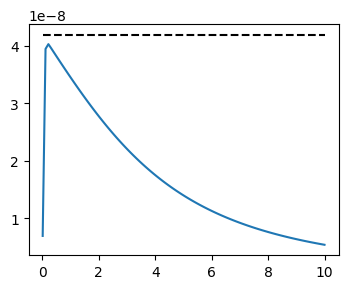

In [2]:
def f(x,y,z):
    assert x*y*z != 0
    return 1/sqrt(x*x + y*y + z*z)**3

def calc_I(f, z, sample_pts_w):
    x, wx, y, wy = sample_pts_w
    assert len(x)==len(wx)==len(y)==len(wy)
    N = len(x)
    result = 0.
    for i in range(N):
        for j in range(N):
            result += wx[i]*wy[j]*f(x[i], y[j], z)
    return float(result)

G = 6.674e-11
M = 1e4
L = 10
sigma = M/L**2
m = 1

N=100
x, wx = gaussxw.gaussxwab(N, -L/2, L/2)
y, wy = x, wx #gaussxw.gaussxwab(N, -L/2, L/2)
sample_pts_w = (x, wx, y, wy)

zmin = 1e-2  # minimum value of z to plot F
z_vals = np.linspace(zmin, 10, 100)
F_vals = []
for z in z_vals:
    Ival = calc_I(f, z, sample_pts_w)
    Fval = G*m*sigma*z*Ival   # unit : Newton (=kg m s-2)  
    F_vals.append(Fval)
F_vals = np.array(F_vals)
assert len(z_vals) == len(F_vals)

F_at_zero = 2*pi*G*m*sigma
print("F_at_zero:", F_at_zero)

plt.figure(figsize=(4, 3))
plt.plot(z_vals, F_vals)
plt.plot(z_vals, F_at_zero*np.ones_like(F_vals), color='black', linestyle='--')
plt.show()

### Artifact

Although $F$ is expected to remain constant at $z\sim 0$, the plot shows a drop at that point.  This drop is an artifact resulting from the following reason.  

The integrand of $I$, that is, $\frac{1}{(x^2+y^2+z^2)^{3/2}}$, has a peak in the region satisfying $x^2+y^2\lesssim z^2$, and almost zero outside that region.  So, if the sampling points of Gaussian quadrature do not pick up this region,  the integration will not be accurate and returns almost zero value.  

In fact, the sampling points at N=100 are as follows:

In [3]:
N=100
x, wx = gaussxw.gaussxwab(N, -L/2, L/2)
print(x)

[ 4.99856863  4.99245975  4.98147567  4.96562469  4.94492198  4.9193877
  4.88904679  4.85392888  4.81406827  4.76950391  4.72027935  4.66644268
  4.60804649  4.54514785  4.47780822  4.4060934   4.33007344  4.24982264
  4.1654194   4.07694619  3.98448946  3.88813955  3.78799059  3.68414045
  3.57669059  3.465746    3.35141508  3.23380954  3.1130443   2.98923735
  2.86250966  2.73298506  2.6007901   2.46605395  2.32890825  2.18948701
  2.04792646  1.90436491  1.75894263  1.61180172  1.46308594  1.3129406
  1.16151241  1.00894932  0.8554004   0.70101569  0.54594602  0.39034291
  0.23435841  0.07814492 -0.07814492 -0.23435841 -0.39034291 -0.54594602
 -0.70101569 -0.8554004  -1.00894932 -1.16151241 -1.3129406  -1.46308594
 -1.61180172 -1.75894263 -1.90436491 -2.04792646 -2.18948701 -2.32890825
 -2.46605395 -2.6007901  -2.73298506 -2.86250966 -2.98923735 -3.1130443
 -3.23380954 -3.35141508 -3.465746   -3.57669059 -3.68414045 -3.78799059
 -3.88813955 -3.98448946 -4.07694619 -4.1654194  -4.24

We see that the sampling points closest to $x=0$ is -0.07814492 or 0.07814492.  So, for example when $z=0.01$, the sharp peak of the integrand cannot be seen by any of the sampling points.  

### How to solve the artifact  
There will be many ways to solve this artifact.  Here, we take a simple and makeshift way: for z below some threshold, we increase the number of sampling points, so that the sharp peak of the integrand can be well picked up by the sampling points.  

What value shold be set for the threshold?  We require that the sampling point closest to 0, that is, 0.07814492, should be well-included in the peak of the integrand.  We define "well-included in the peak" for the sampling point as being within one-third of the peak's standard deviation. We estimate the standard deviation of the peak roughly as $z$.  In these settings, the sampling point 0.07814492 is not well-included in the peak when $z$ is below $0.07814492\times 3$.  So we set the value of the threshold as $z_{\rm threshold} = 0.07814492\times 3$.  

Next, what value should be set for the increased sampling point $N$ when $z$ is below the threshold $z_{\rm threshold}$ ?  We have set the minimum $z$ to plot $F$ as $z_{\rm min}=0.01$.  In order for the sampling point closest to 0 is well-included in the peak with its standard deviation is 0.01, the sampling point must lie within $0.01/3$.  Let us see the sampling point closest to 0 fo several N:

In [4]:
for N in [10**2, 10**3, 10**4]:
    x, wx = gaussxw.gaussxwab(N, -L/2, L/2)
    print(np.min(np.abs(x)))

0.07814492210771543
0.007850052400415967
0.0007853588912417372


Therefore, we take $N=10^4$ as the new number of sampling points when $z<z_{\rm threshold}$, since 0.0007853588912417372 < 0.01/3.  

F_at_zero: 4.1933978740116554e-08


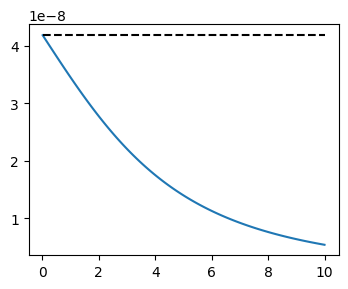

In [5]:
@jit(nopython=True)
def f(x,y,z):
    assert x*y*z != 0
    return 1/sqrt(x*x + y*y + z*z)**3

@jit(nopython=True)
def calc_I(f, z, sample_pts_w):
    x, wx, y, wy = sample_pts_w
    assert len(x)==len(wx)==len(y)==len(wy)
    N = len(x)
    result = 0.
    for i in range(N):
        for j in range(N):
            result += wx[i]*wy[j]*f(x[i], y[j], z)
    return float(result)

G = 6.674e-11
M = 1e4
L = 10
sigma = M/L**2
m = 1

N=100
x, wx = gaussxw.gaussxwab(N, -L/2, L/2)
y, wy = x, wx 
sample_pts_w_100 = (x, wx, y, wy)

N=10000
x, wx = gaussxw.gaussxwab(N, -L/2, L/2)
y, wy = x, wx 
sample_pts_w_10000 = (x, wx, y, wy)

zmin = 1e-2 # minimum value of z to plot F
z_threshold = 0.07814492 * 3.  # threshold to switch to N=10**4
z_vals = np.linspace(zmin, 10, 100)
F_vals = []
for z in z_vals:
    if z<z_threshold:
        Ival = calc_I(f, z, sample_pts_w_10000)
    else:
        Ival = calc_I(f, z, sample_pts_w_100)
    Fval = G*m*sigma*z*Ival   # unit : Newton (=kg m s-2)  
    F_vals.append(Fval)
F_vals = np.array(F_vals)
assert len(z_vals) == len(F_vals)

F_at_zero = 2*pi*G*m*sigma
print("F_at_zero:", F_at_zero)

plt.figure(figsize=(4, 3))
plt.plot(z_vals, F_vals)
plt.plot(z_vals, F_at_zero*np.ones_like(F_vals), color='black', linestyle='--')
plt.show()

Thus the artifact vanishes and $F$ successfully appoaches the theoretically expected value at $z\sim 0$.  

In the code above, we put @numba.jit(nopython=True) to speed up the for-loop for $N=10^4$, otherwize it will take a day for the computation.    nopython=True means that we do not use the Python interpreter in any part of the function. 